# Chicago weather

In this notebook we'll show how to fetch Chicago weather data and import it into Pandas.

As part fo doing data science, it is often necessary to get and process data from various online sources. Such online data is often not perfectly structured and in addition to having to download it, we often also have to clean and reshape it too, before it can be imported – we call this process *data scraping*. In this notebook we'll cover a few common examples.

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

## REST API access

The [Dark Sky](https://darksky.net/) website gives REST API access to historical weather data where we can get responses in JSON. This is a pretty common (& nice) way data can be provided publicly.

To use this API, you need to register in order to get your own unique API key. If you're running this notebook on your own, the key I'm using below won't work, so create your own on their website and enter it below. If you don't feel like going through this process, skip these next few cells and go straight to "Quickly deserialising".

In [4]:
API_KEY = "8c3e39f74d778ee6519f2de32cf039a0" # replace with your own key (this one won't work for you)

Sample API call

In [14]:
import requests

lat, long = 41.8336478,-87.8720476
resp = requests.get(f"https://api.darksky.net/forecast/{API_KEY}/{lat},{long}")

In [15]:
resp.json()

{'alerts': [{'description': '...Dangerous Combination of High Heat and Humidity Forecast Through Monday... ...EXCESSIVE HEAT WARNING REMAINS IN EFFECT UNTIL 7 PM CDT MONDAY... * TEMPERATURES...Highs in the mid to possibly upper 90s Sunday and low to mid 90s Monday. Nighttime readings in the city of Chicago in the 70s to around 80 tonight and around 80 Sunday night. * HEAT INDICES...Peak afternoon heat indices of 100 to 105 are forecast Sunday and Monday. Minimal relief from the heat is expected at night with heat indices likely to remain in the 90s through the evening and in the 80s overnight. * IMPACTS...The extended duration of heat, combined with nearly full sunshine, and oppressive warmth at night will lead to hazardous conditions, particularly for the elderly and those with pre-existing health conditions. Residents of the city of Chicago can call 3...1...1...to request well being checks for elderly friends or family members, or for information on finding the nearest cooling center

Get the temperature at a certain time in the past…

In [87]:
t = '2016-01-01T00:00:00'
def get_daily_weather(t):
    resp = requests.get(
        f"https://api.darksky.net/forecast/{API_KEY}/{lat},{long},{t}",
        params={
            'exclude': 'currently,minutely,alerts,flags',
            'units': 'si'
        }
    )
    hourly_weather = resp.json()
    hourly_weather = pd.DataFrame(hourly_weather['hourly']['data'])
    # for a bonus assignment, try to set periods=24 below and debug an issue that will pop up later ;)
    hourly_weather.index = pd.date_range(start=t, freq='h', periods=len(hourly_weather))
    return hourly_weather
hourly_weather = get_daily_weather(t)
hourly_weather

,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,visibility,windBearing,windGust,windSpeed
2016-01-01 00:00:00,-8.20,0.63,-7.92,0.77,partly-cloudy-night,NaN,0.0000,0.00,NaN,1024.67,Mostly Cloudy,-4.52,1451628000,9.50,248,5.52,2.36
2016-01-01 01:00:00,-8.99,0.55,-8.52,0.77,partly-cloudy-night,NaN,0.0000,0.00,NaN,1024.17,Partly Cloudy,-5.19,1451631600,9.58,257,5.87,2.36
2016-01-01 02:00:00,-10.41,0.31,-9.60,0.76,partly-cloudy-night,NaN,0.0000,0.00,NaN,1023.86,Partly Cloudy,-6.00,1451635200,9.11,261,6.54,2.74
2016-01-01 03:00:00,-11.28,0.10,-9.96,0.78,clear-night,NaN,0.0000,0.00,NaN,1023.83,Clear,-6.71,1451638800,9.58,266,6.37,2.76
2016-01-01 04:00:00,-11.80,0.56,-10.07,0.79,partly-cloudy-night,NaN,0.0000,0.00,NaN,1023.43,Partly Cloudy,-7.07,1451642400,9.50,273,6.59,2.83
2016-01-01 05:00:00,-11.66,0.89,-9.68,0.80,partly-cloudy-night,NaN,0.0000,0.00,NaN,1023.48,Mostly Cloudy,-6.89,1451646000,8.55,271,7.15,2.89
2016-01-01 06:00:00,-10.76,1.00,-8.97,0.82,cloudy,NaN,0.0000,0.00,NaN,1023.43,Overcast,-6.35,1451649600,8.37,272,6.17,2.67
2016-01-01 07:00:00,-9.88,1.00,-8.44,0.81,cloudy,0.018,0.0127,0.01,snow,1023.33,Overcast,-5.68,1451653200,9.64,267,5.70,2.61
2016-01-01 08:00:00,-9.23,1.00,-7.93,0.80,cloudy,0.010,0.0076,0.01,snow,1023.08,Overcast,-5.00,1451656800,9.72,265,6.71,2.75
2016-01-01 09:00:00,-8.45,1.00,-7.49,0.79,cloudy,NaN,0.0000,0.00,NaN,1023.71,Overcast,-4.44,1451660400,9.40,272,6.50,2.64


Perfect! Let's see what this looks like

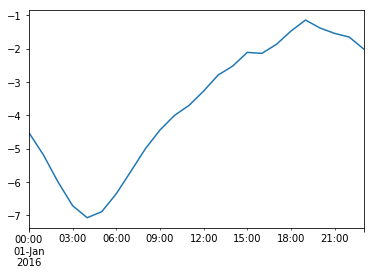

In [77]:
hourly_weather.temperature.plot()

Now that we know how to get a certain day's temperature, we want a whole year's worth of data. First, how do we generate a list of days in a year? `date_range` to the rescue!

In [79]:
range = pd.date_range(start='2016-01-01', end='2017-01-01', freq='d')
range

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', length=367, freq='D')

Finally, let's iterate through all the days, download the data and concatenate all of the daily DataFrames into one big DataFrame containing the whole year's data.

In [90]:
weather_list = []
for t in range:
    print(t.isoformat())
    daily_weather = get_daily_weather(t.isoformat())
    weather_list.append(daily_weather)
weather_list
weather = pd.concat(weather_list)
weather.head(30)

2016-01-01T00:00:00
2016-01-02T00:00:00
2016-01-03T00:00:00
2016-01-04T00:00:00
2016-01-05T00:00:00
2016-01-06T00:00:00
2016-01-07T00:00:00
2016-01-08T00:00:00
2016-01-09T00:00:00
2016-01-10T00:00:00
2016-01-11T00:00:00
2016-01-12T00:00:00
2016-01-13T00:00:00
2016-01-14T00:00:00
2016-01-15T00:00:00
2016-01-16T00:00:00
2016-01-17T00:00:00
2016-01-18T00:00:00
2016-01-19T00:00:00
2016-01-20T00:00:00
2016-01-21T00:00:00
2016-01-22T00:00:00
2016-01-23T00:00:00
2016-01-24T00:00:00
2016-01-25T00:00:00
2016-01-26T00:00:00
2016-01-27T00:00:00
2016-01-28T00:00:00
2016-01-29T00:00:00
2016-01-30T00:00:00
2016-01-31T00:00:00
2016-02-01T00:00:00
2016-02-02T00:00:00
2016-02-03T00:00:00
2016-02-04T00:00:00
2016-02-05T00:00:00
2016-02-06T00:00:00
2016-02-07T00:00:00
2016-02-08T00:00:00
2016-02-09T00:00:00
2016-02-10T00:00:00
2016-02-11T00:00:00
2016-02-12T00:00:00
2016-02-13T00:00:00
2016-02-14T00:00:00
2016-02-15T00:00:00
2016-02-16T00:00:00
2016-02-17T00:00:00
2016-02-18T00:00:00
2016-02-19T00:00:00


,apparentTemperature,cloudCover,cloudCoverError,dewPoint,humidity,icon,precipAccumulation,precipIntensity,precipIntensityError,precipProbability,...,summary,temperature,temperatureError,time,visibility,windBearing,windBearingError,windGust,windSpeed,windSpeedError
2016-01-01 00:00:00,-8.20,0.63,NaN,-7.92,0.77,partly-cloudy-night,NaN,0.0000,NaN,0.00,...,Mostly Cloudy,-4.52,NaN,1451628000,9.50,248,NaN,5.52,2.36,NaN
2016-01-01 01:00:00,-8.99,0.55,NaN,-8.52,0.77,partly-cloudy-night,NaN,0.0000,NaN,0.00,...,Partly Cloudy,-5.19,NaN,1451631600,9.58,257,NaN,5.87,2.36,NaN
2016-01-01 02:00:00,-10.41,0.31,NaN,-9.60,0.76,partly-cloudy-night,NaN,0.0000,NaN,0.00,...,Partly Cloudy,-6.00,NaN,1451635200,9.11,261,NaN,6.54,2.74,NaN
2016-01-01 03:00:00,-11.28,0.10,NaN,-9.96,0.78,clear-night,NaN,0.0000,NaN,0.00,...,Clear,-6.71,NaN,1451638800,9.58,266,NaN,6.37,2.76,NaN
2016-01-01 04:00:00,-11.80,0.56,NaN,-10.07,0.79,partly-cloudy-night,NaN,0.0000,NaN,0.00,...,Partly Cloudy,-7.07,NaN,1451642400,9.50,273,NaN,6.59,2.83,NaN
2016-01-01 05:00:00,-11.66,0.89,NaN,-9.68,0.80,partly-cloudy-night,NaN,0.0000,NaN,0.00,...,Mostly Cloudy,-6.89,NaN,1451646000,8.55,271,NaN,7.15,2.89,NaN
2016-01-01 06:00:00,-10.76,1.00,NaN,-8.97,0.82,cloudy,NaN,0.0000,NaN,0.00,...,Overcast,-6.35,NaN,1451649600,8.37,272,NaN,6.17,2.67,NaN
2016-01-01 07:00:00,-9.88,1.00,NaN,-8.44,0.81,cloudy,0.018,0.0127,NaN,0.01,...,Overcast,-5.68,NaN,1451653200,9.64,267,NaN,5.70,2.61,NaN
2016-01-01 08:00:00,-9.23,1.00,NaN,-7.93,0.80,cloudy,0.010,0.0076,NaN,0.01,...,Overcast,-5.00,NaN,1451656800,9.72,265,NaN,6.71,2.75,NaN
2016-01-01 09:00:00,-8.45,1.00,NaN,-7.49,0.79,cloudy,NaN,0.0000,NaN,0.00,...,Overcast,-4.44,NaN,1451660400,9.40,272,NaN,6.50,2.64,NaN


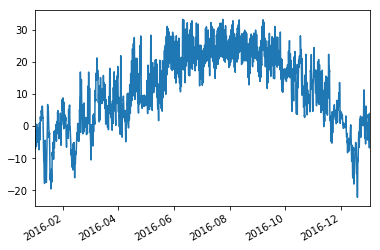

In [91]:
weather.temperature.plot()

### Serialising the data

Let's now persist (or serialise) this data to a CSV file, so that we can load it later.

In [93]:
file_path = 'data/chicago_weather/weather.csv'
weather.to_csv(file_path)

### Deserialising the data

To not have to run the API queries every time, we can just read the data from the CSV file (deserialise it).

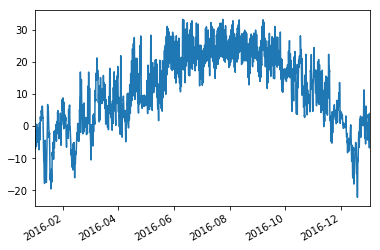

In [111]:
new_weather = pd.read_csv(file_path, index_col=0, parse_dates=True)
new_weather.temperature.plot()

## Unstructured data scraping

Sometimes, there is no API available and we have to resort to scraping the data from HTML pages not meant to be easily machine readable.

**Legal notice –** some websites don't allow being scraped. Please verify that you are allowed to scrape content before you try doing this on your own. The example below is for educational purposes only and does not mean you are allowed to scrape the Weather Underground website – they actually have an [API for developers](https://www.wunderground.com/weather/api/) that you should use instead.

In [113]:
resp = requests.get('https://www.wunderground.com/history/airport/KMDW/2016/1/1/DailyHistory.html')

BeautifulSoup is a useful Python package for accessing information from (untidy, even sometimes not 100% valid) HTML websites.

In [127]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(resp.text, 'html.parser')

In [126]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 9]><html class="no-js ie9"> <![endif]-->
<!--[if gt IE 9]><!-->
<html class="no-js ">
 <!--<![endif]-->
 <head>
  <title>
   Weather History for Chicago Midway, IL | Weather Underground
  </title>
  <link href="//icons.wxug.com/" rel="dns-prefetch"/>
  <link href="//api-ak.wunderground.com/" rel="dns-prefetch"/>
  <meta charset="utf-8">
   <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible">
    <meta content="True" name="HandheldFriendly">
     <meta content="320" name="MobileOptimized">
      <meta content="width=device-width, initial-scale=1, minimal-ui" name="viewport">
       <meta content="on" http-equiv="cleartype">
        <meta content="Weather History for Chicago-Midway, IL - Get Weather History data by the day, week, month, or year with details like temperature, humidity, wind, etc. on Weather Underground." name="description"/>
        <meta content="weather history Chicago-Midway, historical weather, weather almanac, past weather, previo

### Accessing data through CSS selectors

The table we want to access is available under the id `#obsTable`

In [120]:
soup.find_all(id='obsTable')

[<table cellpadding="0" cellspacing="0" class="obs-table responsive" id="obsTable">
 <thead>
 <tr>
 <th>Time <span class="nb">(CST)</span></th>
 <th>Temp.</th>
 <th>Windchill</th>
 <th>Dew Point</th>
 <th>Humidity</th>
 <th>Pressure</th>
 <th>Visibility</th>
 <th>Wind Dir</th>
 <th>Wind Speed</th>
 <th>Gust Speed</th>
 <th>Precip</th>
 <th>Events</th>
 <th>Conditions</th>
 </tr>
 </thead>
 <tbody>
 <tr class="no-metars">
 <td>12:53 AM</td>
 <td>
 <span class="wx-data"><span class="wx-value">-3.9</span><span class="wx-unit"> °C</span></span>
 </td>
 <td>
 <span class="wx-data"><span class="wx-value">-10.5</span><span class="wx-unit"> °C</span></span>
 </td>
 <td>
 <span class="wx-data"><span class="wx-value">-9.4</span><span class="wx-unit"> °C</span></span>
 </td>
 <td>66%</td>
 <td>
 <span class="wx-data"><span class="wx-value">1024.8</span><span class="wx-unit"> hPa</span></span>
 </td>
 <td>
 <span class="wx-data"><span class="wx-value">14.5</span><span class="wx-unit"> km</span></s

Now let's navigate this table to get the children we want…

In [175]:
t_values = []
table = soup.select('#obsTable')[0]
for row in table.tbody.children:
    try:
        value = float(list(row.children)[3].select(".wx-value")[0].text)
        print(value)
        t_values.append(value)
    except AttributeError:
        continue
print(t_values)

-3.9
-4.4
-5.0
-5.6
-6.1
-6.7
-6.7
-6.1
-5.0
-4.4
-3.9
-3.3
-3.3
-2.8
-2.8
-2.2
-1.7
-1.7
-1.7
-1.1
-0.6
-0.6
-0.6
-0.6
-1.1
-1.7
[-3.9, -4.4, -5.0, -5.6, -6.1, -6.7, -6.7, -6.1, -5.0, -4.4, -3.9, -3.3, -3.3, -2.8, -2.8, -2.2, -1.7, -1.7, -1.7, -1.1, -0.6, -0.6, -0.6, -0.6, -1.1, -1.7]


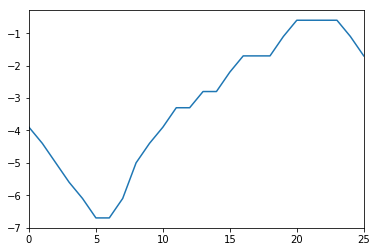

In [176]:
scraped_weather = pd.Series(t_values)
scraped_weather.plot()

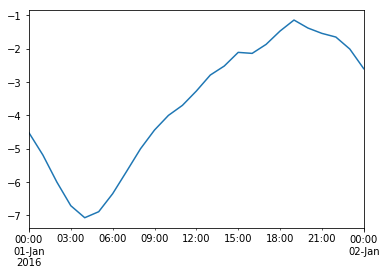

In [179]:
new_weather.temperature[:25].plot()